# **Final Project Worksheet - Rakamin Academy Data Science Batch V** #
## Kelompok: **Astro Boys** ##
### Dataset : Health Insurance ##
### Anggota: ###

- Robertsen Putra Sugianto
- Tossy Adhahir Rukmana Rauf
- Afiqi Ilman Pasha
- Bintang Adi Kusuma
- Arry Averrus Adhiputra


#### **-------README-------**
## **------Untuk STAGE 2 dan seterusnya, harap baca readme STAGE 2 terlebih dahulu**
***Markdown:***
- Untuk membuat topik *(e.g. "STAGE 1") *                        = gunakan # + **bold**
- Untuk membuat sub-topik *(e.g. "0. Problem Statement")*        = gunakan ## + **bold**
- Untuk membuat sub-sub-topik *(e.g. "Library yang digunakan")*  = gunakan empat #


# **STAGE 1**

## **0. Problem Statement**

Polis asuransi adalah pengaturan di mana perusahaan berjanji untuk memberikan jaminan kompensasi atas kehilangan, kerusakan, penyakit, atau kematian tertentu sebagai imbalan atas pembayaran premi tertentu. Premi adalah sejumlah uang yang harus dibayarkan pelanggan secara teratur kepada perusahaan asuransi untuk jaminan ini. Dalam kasus ini kendaraan adalah salah satu asset yang bisa diasuransikan.

India secara kasar menyumbang hanya sekitar 1% dari populasi kendaraan global. Namun, menyumbang sekitar 6% dari total kecelakaan di jalan raya global 1. Seiring banyaknya kasus kecelakaan terjadi di India, bisnis asuransi kendaraan di India juga terus meningkat. Berdasarkan laporan dari regulator asuransi di india pada tahun 2018 bisnis asuransi kendaraan (motor) meningkat hingga 8.91% 1. Peningkatan tersebut memberikan tanda bahwasanya bisnis asuransi kendaraan memiliki kesempatan untuk masih terus dikembangkan.

Sebagai perusahaan asuransi yang telah memiliki data pemilik asuransi kesehatan, mengharapkan dapat digunakanya data tersebut untuk mengembangkan bisnis asuransi kendaraan. Dalam proses pengembangan bisnis asuransi kendaraan membangun model untuk memprediksi apakah pengguna Asuransi kesehatan akan tertarik atau tidak dengan Asuransi Kendaraan akan sangat membantu perusahaan. Hasil prediksi yang tepat dapat digunakan dalam perencanaan strategi komunikasi untuk menjangkau pengguna tersebut dan mengoptimalkan model bisnis. Dengan terjangkaunya calon pengguna serta dengan model bisnis yang tepat diharapkan dapat memaksimalkan jumlah pengguna asuransi kendaraan dan pendapatan perusahaan asuransi.


**Business Domain**	: Vehicle Insurance

**Problem**	: Bagaimana cara memprediksi apakah pemilik asuransi kesehatan akan tertarik dengan Asuransi Kendaraan?.

**Business Metrics**	: Jumlah pelanggan asuransi kesehatan yang menggunakan asuransi kendaraan, Pendapatan.

**Goals**	: Memprediksi ketertarikan pemilik Asuransi kesehatan terhadap Asuransi Kendaraan.

**Objective**	: Membangun model untuk memprediksi apakah pemilik asuransi kesehatan akan tertarik dengan Asuransi Kendaraan dari data – data dari pemilik asurasi kesehatan beserta respon yang diberikan.


## **1. Load Dataset**

### Library yang digunakan

In [ ]:
pip install category_encoders

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

# Feature extraction
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Load Dataset

Data set yang digunakan diambil dari: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/My Drive/AstroBoys_Notebook/data/'

df_train = pd.read_csv(path + 'train.csv')

In [ ]:
df_train=pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')

In [ ]:
df_train.head()

## **2. Data Exploration**

#### Describe Data

In [ ]:
df_train.info()

Pada penggambaran informasi data di atas, terlihat bahwa total terdapat total 12 kolom, 381.109 baris data, serta tidak ada data yang hilang. Dengan 3 kolom diantaranya bersifat kategoris (Gender, Vehicle_Age, Vehicle_Damage), dan 8 kolom sisanya bersifat numerik.

Definisi kolom:

1. id: Nomor identitas unik untuk setiap pelanggan
2. Gender: Jenis kelamin pelanggan
3. Age: Umur pelanggan
4. Driving_License: Apakah pelanggan memiliki SIM atau tidak (Nilai 0: Tidak punya SIM, Nilai 1: Punya SIM)  
5. Region_Code: Kode pos unik untuk setiap wilayah tempat tinggal pelanggan
6. Previously_Insured: Apakah pelanggan sebelumnya pernah memiliki Asuransi Kendaraan (Nilai 0: Tidak pernah punya Asuransi, Nilai 1: Pernah punya Asuransi)
7. Vehicle_Age: Umur kendaraan pelanggan
8. Vehicle_Damage: Apakah kendaraan pelanggan sebelumnya pernah rusak (Nilai 0: Tidak pernah rusak, Nilai 1: Pernah rusak)
9. Annual_Premium: Jumlah biaya premi yang harus dibayarkan pelanggan setiap tahun
10. Policy_Sales_Channel: Kode anonim untuk setiap jalur penawaran ke pelanggan, contohnya melalui Agen, Surat, Telepon, Secara Langsung, dll.)
11. Vintage: Jumlah hari, seberapa lama pelanggan terasosiasikan dengan perusahaan
12. Response: Apakah pelanggan tertarik dengan Asuransi Kendaraan (Nilai 0: Tidak tertarik, Nilai 1: Tertarik)

In [ ]:
df_train.isnull().sum().reset_index()

Pada tabel data di atas, terlihat bahwa dari semua 11 kolom yang tersedia, tidak ada satupun yang memiliki data Null (hilang).

#### Pendekatan Numerik

In [ ]:
df_train.describe()

Pada penggambaran data numerik di atas, terlihat bahwa secara umum, tidak ada data yang secara statistik terlihat aneh, terkecuali kolom Annual_Premium yang memiliki nilai maksimum yang sangat besar dan berbeda jauh dengan nilai minimum. Masukan datanya pun terlihat sama, yakni 381.109 masukan data.

In [ ]:
df_train[['Gender','Vehicle_Age','Vehicle_Damage']].describe()

Pada penggambaran di atas, tampak bahwa data kategoris bersifat wajar. Dengan kolom Gender, memiliki 2 nilai unik, dengan modus yaitu kelompok data Male, dengan kemunculan sebanyak 206.089 kali. Di sisi lain, kolom Vehicle_Age, memiliki 2 nilai unik, dengan modus yaitu kelompok data 1-2 Year, dengan frekuensi nilai sebanyak 200.316. Pada kolom Gender, terlihat bahwa kolom tersebut memiliki 2 nilai unik, dengan modus yaitu kelompok data Yes, dengan kemunculan sebanyak 192.413 kali. Masukan datanya pun terlihat sama, yakni 381.109 masukan data.

#### Pendekatan Grafis: Univariate Analysis

In [ ]:
features1a=['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']
plt.figure(figsize=(12,20))
for i in range(0,len(features1a)):
    plt.subplot(6,9,i+1)
    sns.boxplot(y=df_train[features1a[i]],color='green',orient='v')
    plt.tight_layout()

Dari grafik yang dihasilkan, terdapat Outliers yang cukup banyak untuk kolom Annual_Premium, dengan jumlah cukup yang besar dan jauh

In [ ]:
plt.figure(figsize=(12,20))
for i in range(0,len(features1a)):
    plt.subplot(6,9,i+1)
    sns.violinplot(y=df_train[features1a[i]],color='blue',orient='v')
    plt.tight_layout()

In [ ]:
data_num1=df_train[features1a]
k=len(data_num1.columns)
n=3
m=(k-1)//n+1
fig,axes=plt.subplots(m,n,figsize=(n*5,m*3))
for i,(name,col) in enumerate(data_num1.iteritems()):
    r,c=i//n,i%n
    ax=axes[r,c]
    col.hist(ax=ax,color='green')
    ax2=col.plot.kde(ax=ax,secondary_y=True,title=name,color='red')
    ax2.set_ylim(0)

fig.tight_layout()

Berdasarkan grafik di atas, terlihat bahwa distribusi Age bersifat Positively Skewed. Response pun juga cukup timpang

In [ ]:
features1b=['Gender','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(10,4))
for i in range(0,len(features1b)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df_train[features1b[i]],color='green',orient='v')
    plt.tight_layout()

Dari grafik itu, tampak bahwa Vehicle_Damage memiliki distribusi data yang cukup seimbang. Sementara itu, untuk Vehicle_Age cukup timpang, dengan kategori nilai >2 Years kalah jauh dengan yang lain.

#### Pendekatan Grafis: Multivariate Analysis

In [ ]:
corr_=df_train[features1a].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_,annot=True,fmt=".2f",cmap="BuPu");

Dari grafik Heatmap tersebut, sejauh ini tidak tampak kolom yang memiliki korelasi kuat (nilai > 0.7)

In [ ]:
sns.pairplot(df_train[features1a],
             diag_kind='kde',
             plot_kws={'alpha':0.6,'s':80,'edgecolor':'k','color':'green'},
             size=4);

plt.tight_layout()

In [ ]:
sns.pairplot(df_train[features1a],
             diag_kind='kde',hue='Response',
             plot_kws={'alpha':0.6,'s':80,'edgecolor':'k','color':'green'},
             size=4);

plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
g=sns.catplot(x='Gender',y='Age',hue='Response',data=df_train,ax=ax1)
g=sns.catplot(x='Gender',y='Age',hue='Response',kind='swarm',data=df_train,ax=ax2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
g=sns.catplot(x='Vehicle_Damage',y='Annual_Premium',hue='Response',data=df_train,ax=ax1)
g=sns.catplot(x='Vehicle_Damage',y='Annual_Premium',hue='Response',kind='swarm',data=df_train,ax=ax2)

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Gender',hue='Response',data=df_train,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Gender')

g=sns.barplot(x='Gender',y='Response',data=df_train,ax=ax2)
ax2.set_title('Response Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Response Probability')

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Vehicle_Age',hue='Response',data=df_train,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Vehicle Age')

g=sns.barplot(x='Vehicle_Age',y='Response',data=df_train,ax=ax2)
ax2.set_title('Response Rate by Vehicle Age')
ax2.set_xlabel('Vehicle_Age')
ax2.set_ylabel('Response Probability')

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Vehicle_Damage',hue='Response',data=df_train,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Vehicle Damage')

g=sns.barplot(x='Vehicle_Damage',y='Response',data=df_train,ax=ax2)
ax2.set_title('Response Rate by Vehicle Damage')
ax2.set_xlabel('Vehicle_Damage')
ax2.set_ylabel('Response Probability')

## **3. Data Cleaning**

#### Cek Missing Value

In [ ]:
data_missing_value = df_train.isnull().sum().reset_index()
data_missing_value

In [ ]:
df_train.isnull().sum()

#### Cek Duplikat

In [ ]:
df_train.duplicated().sum()

#### Persebaran data analysis dengan boxplot

In [ ]:
features =  ['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']
plt.figure(figsize=(12,20))
for i in range(0, len(features)):
    plt.subplot(6,9,i+1)
    sns.boxplot(y = df_train[features[i]],color='Navy',orient='v')
    plt.tight_layout()

Dapat dilihat pada variabel *Annual_Premium* terdapat outlier yang sangat banyak

#### Normalization

In [ ]:
df_train=pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
df_test = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')


In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [ ]:
df_test['Response'] = 0
df_test['Response'] = df_test['Response'].astype(int)
df_train['train'] = 1
df_test['train'] = 0

In [ ]:
df_concat = pd.concat([df_train, df_test])

In [ ]:
data_tes = df_concat

In [ ]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_tes['Annual_Premium'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Annual_Premium - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_tes['Annual_Premium'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Annual_Premium - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_tes['Annual_Premium']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Annual_Premium - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_tes['Annual_Premium']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Annual_Premium - log transformation')
ax[1,1].set_xlabel('')


In [ ]:
data_tes['Annual_Premium'] = np.log1p(data_tes['Annual_Premium']+1)

#### Mendeteksi & Membuang outlier

In [ ]:
Q1 = data_tes['Annual_Premium'].quantile(0.25)
Q3 = data_tes['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_tes['Annual_Premium'] >= low_limit) & (data_tes['Annual_Premium'] <= high_limit))
data_tes = data_tes[filtered_entries]

In [ ]:
data_tes.head()

In [ ]:
features11 =  ['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']
plt.figure(figsize=(12,20))
for i in range(0, len(features11)):
    plt.subplot(6,9,i+1)
    sns.boxplot(y = data_tes[features11[i]],color='Red',orient='v')
    plt.tight_layout()

## **4. Feature Engineering**

#### Merging Features

In [ ]:
# data_tes = df_test
# data_tes['Annual_Premium'] = np.log1p(data_tes['Annual_Premium']+1)
df_merge = df_concat

In [ ]:
df_merge.shape

In [ ]:
df_merge['Vehicle_Age']=df_merge['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

#### Standardization / Normailization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
df_merge['Age'] = ss.fit_transform(df_merge['Age'].values.reshape(len(data_tes), 1))
df_merge['Vintage'] = ss.fit_transform(df_merge['Vintage'].values.reshape(len(data_tes), 1))
df_merge['Policy_Sales_Channel'] = ss.fit_transform(df_merge['Policy_Sales_Channel'].values.reshape(len(data_tes), 1))
df_merge['Region_Code'] = ss.fit_transform(df_merge['Region_Code'].values.reshape(len(data_tes), 1))

df_merge['Annual_Premium'] = MinMaxScaler().fit_transform(df_merge['Annual_Premium'].values.reshape(len(data_tes), 1))

In [ ]:
print(df_merge.shape)
print(df_train.shape)

In [ ]:
df_merge.head()

#### Encoding

In [ ]:
# Buat dataframe baru
df_encoded = df_merge
# df_encoded = df_std
object_column = list(df_merge.select_dtypes(include = ['object']).columns)

print("Shape before encoding:",df_encoded.shape)
print("Column to be encoded:",object_column)

# One Hot Encoding
for feature in object_column:
  dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first = True)
  # Append ke dataframe awal
  df_encoded = pd.concat([df_encoded, dummies], axis=1)

print("Shape after encoding:", df_encoded.shape)

# Hapus kolom yang sudah di encoding
df_encoded = df_encoded.drop(object_column,axis= 1)
print("Shape after dropping column:", df_encoded.shape)
df_encoded.head()

In [ ]:
df_encoded.info()

In [ ]:
float_cols = list(df_encoded.select_dtypes(include = ['float64', 'float32', 'float16']).columns)
float_cols

In [ ]:
df_encoded[float_cols] = df_encoded[float_cols].astype(int)

In [ ]:
df_encoded.head()

In [ ]:
# Pesebaran sebelum handling class imbalance
sns.countplot(x = 'Response', data = df_encoded)

In [ ]:
from imblearn import under_sampling, over_sampling

# Pemisahan fitur dan target
X = df_encoded.drop(['Response'],axis=1)
x_columns = list(X.columns)
y = df_encoded['Response']

# Under sampling
X_under, y_under = over_sampling.RandomOverSampler(random_state=42).fit_resample(X, y)

# Mengubah numpy array ke Dataframe agar bisa diconcat
X_under = pd.DataFrame(X_under)
y_under = pd.DataFrame(y_under)

# Rename lagi biar namanya ga 0,1,2,3,4,.... 
X_under.columns = x_columns
y_under = y_under.rename(columns = {0: 'Response'})

# Concat dan buat dataframe baru
df_under = pd.concat([X_under,y_under], axis = 1)

# Hapus id
df_under = df_under.drop('id',axis =1)

df_under.head()

In [ ]:
# Setelah class imbalance
sns.countplot(x = 'Response', data = df_under)

#### Penentuan Feature

In [ ]:
# Buat df baru
df_final = df_encoded

features = list(df_final.columns)
corr_= df_final[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Pada tahap awal, akan digunakan keseluruhan fiturnya terlebih dahulu (hanya dengan menghapus id)

Untuk tahap selanjutnya apabila performa model kurang baik, akan digunakan fitur demikian:

*   Age
*   Previously_Insurance
*   Policy_Sales_Channel
*   Vehicle_Age
*   Vehicle_Damage

Dan membuang:

*   id
*   Driving Lcense 
*   Region_Code
*   Annual_Premium
*   Vintage
*   Gender

## **5. Save to another stage**

In [ ]:
from datetime import date

today = date.today()

# ddmmYYYY
d1 = today.strftime("%d%m%Y")
print(d1)
out_file = 'data' + '-' + 'stage1' + '-' + '31012021' + '.csv'
path = '' + out_file
df_final.to_csv(path, index=False)

# **STAGE 2**

#### **-------README UNTUK STAGE SELANJUTNYA-------**
Biarkan setiap STAGE independen dengan cara menjalankan sesuai dengan stagenya

**EDA & Insight (STAGE 2) :**
- Gunakan bagian load code di bagian STAGE 2 saja karena mau nyari insight 

**MODELING (STAGE 3) :**
- Gunakan bagian load code di bagian STAGE 3 saja buat load data yang sudah di preprocess agar tidak load ulang dari awal.
- Untuk meload data, load data dengan format 'data-stage1-{tanggal}.csv' dengan tanggal terbaru yang tersedia di google drive

Contoh: (17012021)

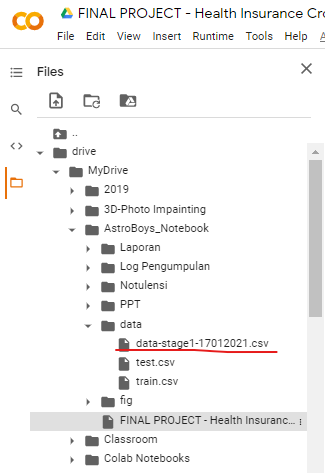


## **0.LOAD DATA AWAL**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/My Drive/AstroBoys_Notebook/data/'

df= pd.read_csv(path + 'train.csv')

In [ ]:
df.head()

## Robert

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot('Vehicle_Damage', hue ='Response', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Is owner vehicle has even damaged?',fontsize=15)
plt.ylabel(ylabel = 'Number of People',fontsize=15)
plt.legend(title = 'Get insurance', labels = ['No','Yes'], fontsize = 12)
df_insight_damage = df.groupby(['Vehicle_Damage','Response'])['id'].count().reset_index().rename(columns={'id' : 'count'})
res_insight_damage = list(df_insight_damage['Response'])
dam_insight_damage = list(df_insight_damage['Vehicle_Damage'])
count_insight_damage = list(df_insight_damage['count'])
for i in range(0,len(res_insight_damage)):
    plt.text(x = (0 if dam_insight_damage[i] == 'Yes' else 1) + (-0.3 if res_insight_damage[i]%2 == 0 else 0.13) 
             , y = count_insight_damage[i] +3000
             , s=str(count_insight_damage[i])
             , fontsize=13 
             , fontweight='bold')

plt.text(x =-0.8, y= 230000, s = 'People who had their car damaged most like take the insurance', fontweight = 'bold', fontsize = 18)
plt.text(x =-0.8, y= 220000, s = 'The bad experience that someone has with their vehicle will make people think ', fontsize = 14)
plt.text(x =-0.8, y= 210000, s = 'more about taking out insurance', fontsize = 14)


In [ ]:
df_insight_region = df[df['Response'] == 1].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(5)
df_insight_region['Region_Code'] = df_insight_region['Region_Code'].astype(int)

plt.figure(figsize = (10,8))
sns.barplot(x = 'Region_Code', y = 'Response', data =df_insight_region)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Region Code',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Region_Code')['Response'])
reg_insight_region = list(df_insight_region.sort_values('Region_Code')['Region_Code'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.2
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=13 
             , fontweight='bold')
    
plt.text(x =-1, y= 22500, s = 'People who are in region code 28 tend to choose to use insurance', fontweight = 'bold', fontsize = 18)
plt.text(x =-1, y= 21500, s = 'Region 28 is the largest contributor to people using insurance ', fontsize = 14)
plt.text(x =2.5, y= 20000, s = '*data is taken from people who are',fontstyle = 'italic', fontsize = 12)
plt.text(x =2.9, y= 19300, s = 'confirmed to take insurance',fontstyle = 'italic', fontsize = 12)


In [ ]:
df_insight_region_0 = df[df['Response'] == 0].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(10)
reg_insight_region_0 = list(df_insight_region_0.sort_values('Region_Code')['Region_Code'])
df_insight_region_1 = df[df['Response'] == 1].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(10)
reg_insight_region_1 = list(df_insight_region_1.sort_values('Region_Code')['Region_Code'])

df_car_damage_0 = df[(df['Response'] == 0) & (df['Region_Code'].isin(reg_insight_region_0))]
df_car_damage_1 = df[(df['Response'] == 1) & (df['Region_Code'].isin(reg_insight_region_1))]

df_merge_car_damage = pd.concat([df_car_damage_0,df_car_damage_1])
df_merge_car_damage['Region_Code'] = df_merge_car_damage['Region_Code'].astype(int)

plt.figure(figsize=(15,12))
sns.countplot(y ='Region_Code', hue = 'Response', data= df_merge_car_damage)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(ylabel = 'Region Code',fontsize=15)
plt.xlabel(xlabel = 'Count',fontsize=15)
plt.grid()

df_nol = df_merge_car_damage[df_merge_car_damage['Response'] == 0]['Region_Code'].value_counts().reset_index()
xlabel_reg_0 = list(df_nol['index'])
ylabel_reg_0 = list(df_nol['Region_Code'])
df_satu= df_merge_car_damage[df_merge_car_damage['Response'] == 1]['Region_Code'].value_counts().reset_index()
xlabel_reg_1 = list(df_satu['index'])
ylabel_reg_1 = list(df_satu['Region_Code'])

x_percentage = list(df_merge_car_damage.sort_values('Region_Code')['Region_Code'].unique())
y_percentage = []
y_real_value = []

print(x_percentage)
def search_list(list, x):
    for i in range(0,len(list)):
        if(list[i] == x):
            return True, i
    return False, -1

for i in x_percentage:
    res1, id1 = search_list(xlabel_reg_0, i)
    res2, id2 = search_list(xlabel_reg_1, i)
    if (res1 and res2):
        y_percentage.append(100*(ylabel_reg_1[id2]/ylabel_reg_0[id1]))
        y_real_value.append(ylabel_reg_1[id2])
    else:
        y_percentage.append(0)
        if res2:
            y_real_value.append(ylabel_reg_1[id2])
        else:
             y_real_value.append(0)

for i in range(0, len(x_percentage)):
     plt.text(y = i + 0.3
             , x = y_real_value[i] + 300
             , s=str(round(y_percentage[i],2)) + '%'
             , fontsize=12)

plt.text(x =0, y= -1.3, s = 'Opportunities for people in region 28 to take part in the insurance program are 23.03%', fontweight = 'bold', fontsize = 18)
plt.text(x =0, y= -1, s = 'Region code 28 is the region that contributes the most to our vehicle ', fontsize = 14)
plt.text(x =0, y= -0.7, s = 'insurance customers, followed by region code 29', fontsize = 14)


In [ ]:
df_insight_region = df[df['Vehicle_Damage'] == 'Yes'].groupby('Region_Code').count().reset_index().sort_values('Vehicle_Damage', ascending = False).head(5)
df_insight_region
plt.figure(figsize = (10,8))
sns.barplot(x = 'Region_Code', y = 'Vehicle_Damage', data =df_insight_region)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Region Code',fontsize=15)
plt.ylabel(ylabel = 'Count of Damaged Vehicle',fontsize=15)

# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Region_Code')['Response'])
reg_insight_region = list(df_insight_region.sort_values('Region_Code')['Region_Code'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.2
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=13 
             , fontweight='bold')
    
plt.text(x =-1, y= 80000, s = 'The increase in the number of insurance users in region 28', fontweight = 'bold', fontsize = 18)
plt.text(x =0.3, y= 77000, s = 'was due to many damaged cars', fontweight = 'bold', fontsize = 18)


In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(df[df['Response'] == 0]['Age'],hist = False, kde_kws ={"lw" :3}, ax = ax)
sns.distplot(df[df['Response'] == 1]['Age'],hist = False, kde_kws ={"lw" :3}, ax = ax)
plt.legend(title = 'Response', labels = ['No', 'Yes'], fontsize = 12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Age',fontsize=15)
plt.ylabel(ylabel = 'PDF',fontsize=15)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((30, 0), 20, 0.07, fill=True, facecolor ='red', alpha=0.1))
ax.add_patch(Rectangle((30, 0), 20, 0.07, fill=None, edgecolor='red', alpha=1, linestyle = '--', linewidth = 2))

plt.text(x =20, y= 0.073, s = 'The age range of 30-50 years is the age range in which ', fontweight = 'bold', fontsize = 18)
plt.text(x =35, y= 0.07, s = 'it is possible to take out insurance', fontweight = 'bold', fontsize = 18)


#### Tossy

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Gender',hue='Response',data=df,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Gender')

g=sns.barplot(x='Gender',y='Response',data=df,ax=ax2)
ax2.set_title('Response Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Response Probability')

Insight: Gender Male terlihat lebih responsif dengan penawaran Asuransi Kendaraan ini apabila dibandingkan dengan Female, meskipun memang baik gender Male maupun Female memilih respon 'tidak tertarik'

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Vehicle_Age',hue='Response',data=df,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Vehicle Age')

g=sns.barplot(x='Vehicle_Age',y='Response',data=df,ax=ax2)
ax2.set_title('Response Rate by Vehicle Age')
ax2.set_xlabel('Vehicle_Age')
ax2.set_ylabel('Response Probability')

Insight: Mayoritas Pelanggan yang memiliki kendaraan dengan umur lebih tua (1-2 tahun & >2 tahun) tampak lebih responsif dengan penawaran Asuransi Kendaraan. Secara umum, pelanggan dengan kendaraan tua juga lebih memilih respon 'tertarik', dibandingkan dengan kendaraan muda

In [ ]:
sns.catplot(
    x = 'Vehicle_Age',
    y = 'Age',
    hue = 'Response',
    data = df
)

plt.tight_layout()

Insight: Pelanggan dengan umur kendaraan > 2 tahun, dari yang usia muda sampai tua, memang tertarik dengan penawaran Asuransi Kendaraan

In [ ]:
sns.catplot(
    x = 'Vehicle_Damage',
    y = 'Age',
    hue = 'Response',
    data = df
)

plt.tight_layout()

Insight: Pelanggan dengan kendaraan yang pernah rusak, dari yang usia muda sampai tua, memang tertarik dengan penawaran Asuransi Kendaraan

Tips: Ada baiknya kalau penawaran Asuransi Kendaraan ini lebih digencarkan untuk pelanggan dengan kendaraan tua & pernah rusak

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Previously_Insured',hue='Response',data=df,ax=ax1,palette='husl')

g=sns.barplot(x='Previously_Insured',y='Response',data=df,ax=ax2)

Insight: Menariknya, pelanggan yang sebelumnya sudah memiliki Asuransi lainnya, kurang tertarik dengan penawaran Asuransi Kendaraan ini

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Driving_License',hue='Response',data=df,ax=ax1,palette='husl')

g=sns.barplot(x='Driving_License',y='Response',data=df,ax=ax2)

Insight: Pelanggan yang memiliki SIM, lebih cenderung tertarik dengan penawaran Asuransi Kendaraan

Tips: Disarankan bahwa penawaran Asuransi Kendaraan ini lebih ditujukan kepada pelanggan yang belum pernah memiliki asuransi sama sekali, tapi punya SIM

Insights & Tips Summary:

1. Gender Male terlihat lebih responsif dengan penawaran Asuransi Kendaraan ini apabila dibandingkan dengan Female, meskipun memang baik gender Male maupun Female memilih respon 'tidak tertarik'
2. Mayoritas Pelanggan yang memiliki kendaraan dengan umur lebih tua (1-2 tahun & >2 tahun) tampak lebih responsif dengan penawaran Asuransi Kendaraan. Secara umum, pelanggan dengan kendaraan tua juga lebih memilih respon 'tertarik', dibandingkan dengan kendaraan muda
3. Pelanggan dengan umur kendaraan > 2 tahun, dari yang usia muda sampai tua, memang tertarik dengan penawaran Asuransi Kendaraan
4. Pelanggan dengan kendaraan yang pernah rusak, dari yang usia muda sampai tua, memang tertarik dengan penawaran Asuransi Kendaraan
5. (Tips: Ada baiknya kalau penawaran Asuransi Kendaraan ini lebih digencarkan untuk pelanggan dengan kendaraan tua & pernah rusak)
6. Menariknya, pelanggan yang sebelumnya sudah memiliki Asuransi lainnya, kurang tertarik dengan penawaran Asuransi Kendaraan ini
7. Pelanggan yang memiliki SIM, lebih cenderung tertarik dengan penawaran Asuransi Kendaraan
8. (Tips: Disarankan bahwa penawaran Asuransi Kendaraan ini lebih ditujukan kepada pelanggan yang belum pernah memiliki asuransi sama sekali, tapi punya SIM)

# **STAGE 3**

## **0.LOAD DATA BERSIH**

In [ ]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
train = df_encoded[df_encoded['train'] == 1]
test = df_encoded[df_encoded['train'] == 0]
train = train.drop(['id', 'train'], axis = 1)
test = test.drop(['train', 'Response'], axis = 1)

In [ ]:
train.shape, test.shape

In [ ]:
# split independent variabel dan dependent variabel
X = train.drop('Response', axis = 1).values
y = train['Response'].values
X.shape, y.shape

In [ ]:
# split test dan train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y, shuffle = True)

In [ ]:
df_baru = pd.DataFrame(columns = ['keterangan', 'train_auc' ,'val_auc', 'test_auc'])

In [ ]:
df_baru = df_baru.append({'keterangan' : 'capek ah',
                          'train_auc' : train_mean,
                          'val_auc' : val_mean,
                          'test_auc' : test_mean}, ignore_index = True)

In [ ]:
df_baru

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#Hyper Paramete
hyperparameters = {
                    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                    "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
                    "min_child_weight": [ 1, 3, 5, 7 ],
                    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                    "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ],
                    "eta":[.3, .2, .1, .05, .01, .005],
                    "estimator" : [100, 200, 300, 500]
                  }

classifier = xgb.XGBClassifier(random_state = 42)

clf = RandomizedSearchCV(classifier, hyperparameters, cv = 5, random_state=42, scoring='roc_auc', verbose = 4, n_jobs = -1)
best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
roc_auc_list = []
roc_auc_holdout = []
roc_auc_train = []
folds = []

# Sudah di tuning
# model = xgb.XGBClassifier(colsample_bytree=0.7, eta=0.2, gamma=0.4,
#                           learning_rate=0.05, max_depth=8,
#                           min_child_weight=5,
#                           n_estimators=100, n_jobs=-1)
model = xgb.XGBClassifier()
kfold = StratifiedKFold(n_splits= 10, random_state = 42,shuffle =True)
for i,(train_index, test_index) in enumerate(kfold.split(X_train, y_train)):
    X1_train, X1_valid = X[train_index], X[test_index]
    y1_train, y1_valid = y[train_index], y[test_index]
    model.fit(X1_train, y1_train)
    train_pred = model.predict_proba(X1_train)[:,1] # 70%
    #Measure of the fit of your model.
    pred = model.predict_proba(X1_valid)[:,1] # 10%
    # DATA WHICH MODEL HAS NOT SEEN
    pred_holdout = model.predict_proba(X_test)[:,1] # 20%
    
    print('Prediction length on validation set, XGBoost Classifier, fold ', i, ': ', len(pred))

    folds.append(i)
    roc_auc_list.append(roc_auc_score(y1_valid, pred))
    roc_auc_holdout.append(roc_auc_score(y_test, pred_holdout))
    roc_auc_train.append(roc_auc_score(y1_train, train_pred))

In [ ]:
# df_coba = pd.DataFrame(columns = ['keterangan', 'acc', 'f1', 'auc'])

In [ ]:
# df_coba = df_coba.append({'keterangan': 'encode,log,outl,veh_age, scale',
#                           'estimator' : model,
#                           'acc' : accuracy_score(y_test, y_pred),
#                           'f1' : f1_score(y_test, y_pred),
#                           'auc' : roc_auc_score(y_test, y_pred_proba[:,1]),
#                           }, ignore_index = True)

In [ ]:
df_coba

In [ ]:
import pickle
filename = 'xgb_final.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
df_encoded = df_encoded.drop('id',axis = 1)
X_new_test = df_encoded.values
df_encoded.head()


In [ ]:
del test['id']


In [ ]:
test

In [ ]:
y_new_pred = model.predict(test.values)

In [ ]:
y_new = pd.DataFrame(y_new_pred)
y_new.value_counts()

In [ ]:
df_out = pd.concat([df_encoded['id'], y_new],axis = 1)
df_out = df_out.rename(columns ={0: 'Response'})
df_out.head()

In [ ]:
sample_.to_csv('out7.csv', index =False)

In [ ]:
df_out.info()

In [ ]:
sample_ = pd.read_csv('../input/health-insurance-cross-sell-prediction/sample_submission.csv')

In [ ]:
sample_['Response'] = y_new_pred

sample_.info()

In [ ]:
sample_.info()